# Sales prediction using python

In [ ]:
#Sales prediction involves forecasting the amount of a product that
#customers will purchase, taking into account various factors such as
#advertising expenditure, target audience segmentation, and
#advertising platform selection.

#Building a model which predicts sales based on the money spent on different platforms for marketing. 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\PURVA\Downloads\advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
data.shape

(200, 4)

In [4]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [30]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [31]:
#avg expense is spent more on tv 
#avg expense spend lowest on radio
#maximum sale is 27

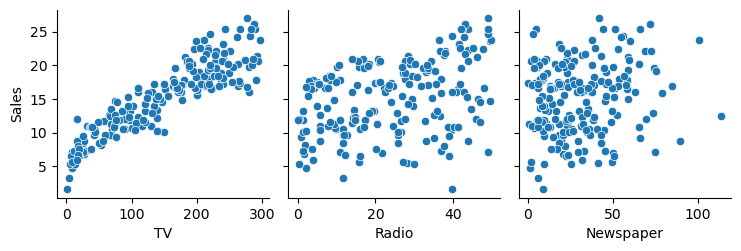

In [7]:
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'],kind='scatter')
plt.show()

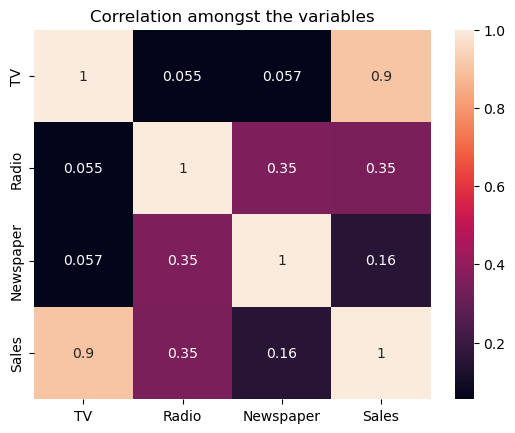

In [32]:
sns.heatmap(data.corr(),annot=True)
plt.title("Correlation amongst the variables")
plt.show()  #sales is highly correlated with the tv

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X=data.drop(columns='Sales',axis=1)
y=data['Sales']

In [11]:
X.shape

(200, 3)

In [12]:
y.shape

(200,)

In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=42)

In [15]:
xtrain.shape

(140, 3)

In [16]:
xtest.shape

(60, 3)

In [17]:
ytrain.shape

(140,)

In [18]:
ytest.shape

(60,)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()

In [21]:
model.fit(xtrain,ytrain)

LinearRegression()

In [24]:
pred = model.predict(xtest)
print(pred)

[17.15991908 20.53369503 23.68914396  9.5191455  21.60736836 12.78101318
 21.08636345  8.76054246 17.11499951 16.68789636  8.97584663  8.57645026
 18.33212325  8.17863567 12.64605571 14.94486946  8.34939536 17.83858948
 11.12172174 20.37740648 20.9483297  13.04035779 11.01360656 22.51142595
  9.40369784  7.98591291 20.86943368 13.77882255 10.83407064  8.00419229
 15.88597618 10.7027424  20.9521718  10.84679243 21.50720813 21.07347295
 12.22673775 22.85273767 12.57698182  6.54597206 11.93411853 15.23490068
 10.07411153  9.52159696 17.11786382  7.28032677 10.49404864 15.24356754
 11.20742176 11.78392665 14.01472163 14.59884572 10.82722434  9.55839415
  9.03749681 12.51183313 10.52551021 25.01900824  7.99334943 15.73916263]


In [33]:
from sklearn.metrics import r2_score
print(f'Testing Accuracy: {round(100*r2_score(ytest,pred),2)}%')

Testing Accuracy: 90.91%


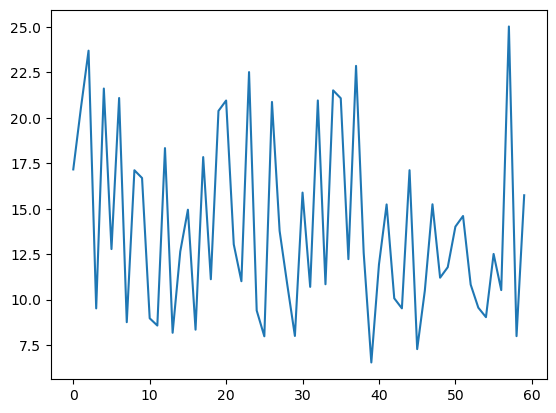

In [29]:
plt.plot(pred)

In [34]:
xtrain_predict = model.predict(xtrain)

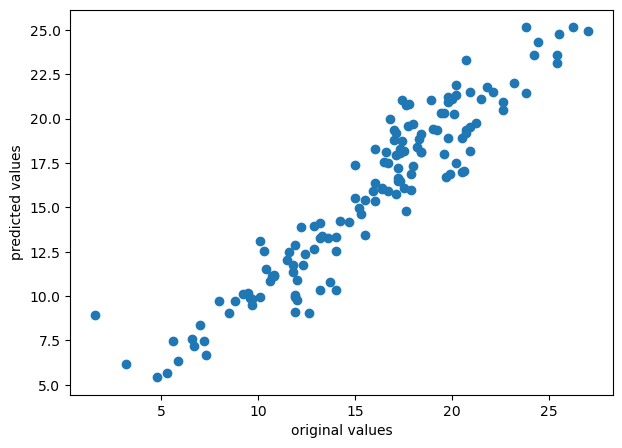

In [35]:
plt.figure(figsize=[7,5])
plt.scatter(ytrain,xtrain_predict)
plt.xlabel("original values")
plt.ylabel("predicted values")
plt.show()


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [37]:
mse = mean_squared_error(ytest,pred)
mae = mean_absolute_error(ytest,pred)

In [38]:
print(mse)
print(mae)

2.5416240362291473
1.1594875061090582


In [ ]:
#lower the values of mse and mae indicates higher accuracy of the regression models